# Estimate physical quantities of a binary system using observed quantities.

## Initialization

### All imports

In [1]:
# Import system packages.
from __future__ import absolute_import, division, print_function
import sys
import warnings
# Import installed packages.
import numpy as np
import scipy.constants as sci_con
import astropy.constants as ast_con
import binstarsolver as bss
# IPython magic.
%matplotlib inline

### Globals

In [2]:
warnings.simplefilter('always')

### Custom functions

In [3]:
# Define functions for evaluation:
def is_close(ref, test, rtol=1e-2, name=None, verbose=False):
    """Evaluate whether a calulated value is within a relative tolerance
    of the reference value. Convenience method for `numpy.isclose`.
    
    Parameters
    ----------
    ref : float
        Reference value to be tested against.
    test : float
        Calculated value to be tested.
    rtol : {0.01}, float, optional
        Relative tolerance value to determine if `test` is close to `ref`.
    name : {None}, string, optional
        Name of quantity being tested for printed output.
    verbose : {False, True}, bool, optional
        Print outcome of test if `True`.
    
    Returns
    -------
    is_close : bool
        Boolean for whether or not calculated value was
        within the tolerance of the reference value.
        
    See Also
    --------
    numpy.isclose, summarize_failures
    
    """
    is_close = np.isclose(ref, test, rtol=rtol)
    report = \
        ("    name = {name}\n" +
         "    ref  = {ref}\n" +
         "    test = {test}\n" +
         "    rtol = {rtol}").format(
            name=name, ref=ref, test=test, rtol=rtol)
    if is_close:
        if verbose:
            print(
                ("INFO: Reference and calculated values match within tolerance.\n" +
                 report))
    else:
        warnings.warn(
            ("\n" +
             "Reference and calculated values do not match within tolerance.\n" +
             report))
    return is_close


def summarize_failures(tests_failed):
    """Print summary of tests that have failed.
    
    Parameters
    ----------
    tests_failed : array
        Array of string names of tests that have failed.
        
    Returns
    -------
    None
    
    See Also
    --------
    is_close
    
    Notes
    -----
    The names from `tests_failed` will be formatted with a message and printed to stdout.
    If `tests_failed` == [], then the message will state that all tests passed.
    
    """
    if tests_failed == []:
        print("INFO: Tests complete. All tests passed.")
    else:
        warnings.warn(
            ("\n" +
             "Tests complete. Some tests failed:\n" +
             "tests_failed = {tf}").format(tf=tests_failed))
    return None

## Example from Budding, 2007, Introduction to Astronomical Photometry

Example from section 7.3 of [Budding, 2007, Introduction to Astronomical Photometry](https://books.google.com/books?id=g_K3-bQ8lTUC) (Object: YZ Cas, Source: Kron, 1942, Astrophysical Journal, 96, 173).

Assumptions: Spherical stars. No limb darkening. No orbital eccentricity.

**Note:**
- From section 7.2 of Budding, 2007, which star is the "primary" star depends on context. In photometry, the primary is the star with the greatest brightness per unit area. In spectroscopy, the primary is the star with the greater overall luminosity. In stellar evolution models, the primary is the star originally with the most mass, however mass can be transferred, lost, or gained.
- Here, we use Budding's method and define the eclipse events by whether the star with the smallest radius is being occulted or whether that star is transitiing.

In [4]:
print(80*'=')
print("OBSERVED VALUES")
print()
print("Light levels, relative:")
light_ref = 1.0 # Between minima.
light_oc  = 0.898 # During occultation minima.
light_tr  = (0.745 + 0.733) / 2.0 # During transit minima.
print("Between minima:            light_ref = {lr}".format(lr=light_ref))
print("During occultation minima: light_oc  = {lo}".format(lo=light_oc))
print("During transit minima:     light_tr  = {lt}".format(lt=light_tr))
print()
print("Phases of eclipse events:")
p0 = 0.0 # Mid-eclipse.
p1 = p0 - np.deg2rad(12.3) # Begin ingress.
p2 = p0 - np.deg2rad(3.5) # End ingress.
p3 = p0 + np.deg2rad(3.5) # Begin egress.
p4 = p0 + np.deg2rad(12.3) # End egress.
print("Mid-eclipse:   p0 = {p0} degrees phase".format(p0=np.rad2deg(p0)))
print("Begin ingress: p1 = {p1} degrees phase".format(p1=np.rad2deg(p1)))
print("End ingress:   p2 = {p2} degrees phase".format(p2=np.rad2deg(p2)))
print("Begin egress:  p3 = {p3} degrees phase".format(p3=np.rad2deg(p3)))
print("End egress:    p4 = {p4} degrees phase".format(p4=np.rad2deg(p4)))

OBSERVED VALUES

Light levels, relative:
Between minima:            light_ref = 1.0
During occultation minima: light_oc  = 0.898
During transit minima:     light_tr  = 0.739

Phases of eclipse events:
Mid-eclipse:   p0 = 0.0 degrees phase
Begin ingress: p1 = -12.3 degrees phase
End ingress:   p2 = -3.5 degrees phase
Begin egress:  p3 = 3.5 degrees phase
End egress:    p4 = 12.3 degrees phase


CALCULATED VALUES

Smaller-radius star (_s).
Greater-radius star (_g).

Integrated flux of stars relative to integrated flux of total system:
flux_intg_rel_s = 0.102
flux_intg_rel_g = 0.898

Ratio of stellar radii from relative light levels:
radii_ratio_lt = radius_s / radius_g from light levels = 0.539115831462

Numerical solution for orbital inclination:


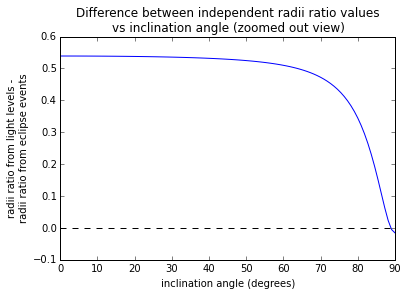

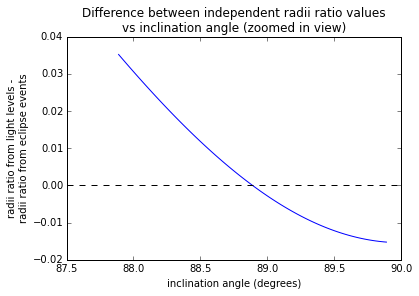

incl = 88.8888888889 degrees

Stellar radii (recalculated using timings from eclipse events):
radius_sep_s = 0.0749139580237 star-star separation distance
radius_sep_g = 0.138957275514 star-star separation distance


In [5]:
print(80*'=')
print("CALCULATED VALUES")
print()
print("Smaller-radius star (_s).")
print("Greater-radius star (_g).")
print()
print("Integrated flux of stars relative to integrated flux of total system:")
(flux_intg_rel_s, flux_intg_rel_g) = \
    bss.utils.calc_fluxes_intg_rel_from_light(light_oc=light_oc, light_ref=light_ref)
print("flux_intg_rel_s = {firs}".format(firs=flux_intg_rel_s))
print("flux_intg_rel_g = {firg}".format(firg=flux_intg_rel_g))
print()
print("Ratio of stellar radii from relative light levels:")
radii_ratio_lt = bss.utils.calc_radii_ratio_from_light(light_oc=light_oc, light_tr=light_tr, light_ref=light_ref)
print("radii_ratio_lt = radius_s / radius_g from light levels = {rrl}".format(rrl=radii_ratio_lt))
print()
print("Numerical solution for orbital inclination:")
phase_orb_ext = p4
phase_orb_int = p3
incl_rad = \
    bss.utils.calc_incl_from_radii_ratios_phase_incl(
        radii_ratio_lt=radii_ratio_lt, phase_orb_ext=phase_orb_ext, phase_orb_int=phase_orb_int, show_plots=True)
print("incl = {incl} degrees".format(incl=np.rad2deg(incl_rad)))
print()
print("Stellar radii (recalculated using timings from eclipse events):")
sep_proj_ext = bss.utils.calc_sep_proj_from_incl_phase(incl=incl_rad, phase_orb=phase_orb_ext)
sep_proj_int = bss.utils.calc_sep_proj_from_incl_phase(incl=incl_rad, phase_orb=phase_orb_int)
(radius_sep_s, radius_sep_g) = \
    bss.utils.calc_radii_sep_from_seps(sep_proj_ext=sep_proj_ext, sep_proj_int=sep_proj_int)
print("radius_sep_s = {rs} star-star separation distance".format(rs=radius_sep_s))
print("radius_sep_g = {rg} star-star separation distance".format(rg=radius_sep_g))

In [6]:
print(80*'=')
print("COMPARE TO PUBLISHED VALUES")
radii_ratio_lt_ref = 0.539
radius_sep_s_ref = 0.075
radius_sep_g_ref = 0.139
incl_deg_ref = 88.9
tests_failed = []
for (name, ref, test) in zip(['radii_ratio_lt', 'radius_sep_s', 'radius_sep_g', 'incl_deg'],
                             [radii_ratio_lt_ref, radius_sep_s_ref, radius_sep_g_ref, incl_deg_ref],
                             [radii_ratio_lt, radius_sep_s, radius_sep_g, np.rad2deg(incl_rad)]):
    if not is_close(ref=ref, test=test, rtol=2e-3, name=name, verbose=True):
        tests_failed.append(name)
summarize_failures(tests_failed)

COMPARE TO PUBLISHED VALUES
INFO: Reference and calculated values match within tolerance.
    name = radii_ratio_lt
    ref  = 0.539
    test = 0.539115831462
    rtol = 0.002
INFO: Reference and calculated values match within tolerance.
    name = radius_sep_s
    ref  = 0.075
    test = 0.0749139580237
    rtol = 0.002
INFO: Reference and calculated values match within tolerance.
    name = radius_sep_g
    ref  = 0.139
    test = 0.138957275514
    rtol = 0.002
INFO: Reference and calculated values match within tolerance.
    name = incl_deg
    ref  = 88.9
    test = 88.8888888889
    rtol = 0.002
INFO: Tests complete. All tests passed.


## Example from Carroll and Ostlie, 2007, An Introduction to Modern Astrophysics

Examples 7.3.1, 7.3.2 of [Carroll and Ostlie, 2007, An Introduction to Modern Astrophysics](http://books.google.com/books/about/An_Introduction_to_Modern_Astrophysics.html?id=M8wPAQAAMAAJ).

Assumptions: Spherical stars. No limb darkening. No orbital eccentricity. Orbital inclination = 90 deg.

**Note:**
- Carroll and Ostlie, 2007 define the primary eclipse by depth of eclipse.
- From section 7.2 of Budding, 2007, which star is the "primary" star depends on context. In photometry, the primary is the star with the greatest brightness per unit area. In spectroscopy, the primary is the star with the greater overall luminosity. In stellar evolution models, the primary is the star originally with the most mass, however mass can be transferred, lost, or gained.
- Here, we use Budding's method and define the eclipse events by whether the star with the smallest radius is being occulted or whether that star is transitiing.

In [7]:
# Assumptions:
incl_rad = np.deg2rad(90.0)
print()
print("Assumed inclination: {ideg} degrees".format(ideg=np.rad2deg(incl_rad)))
print()
print(80*'=')
print("OBSERVED VALUES")
print()
print("Smaller-radius star (_s).")
print("Greater-radius star (_g).")
print()
print("Stellar radial velocities:")
velr_s   = 33.0*sci_con.kilo # in m/s, smaller star
velr_g   = 3.1*sci_con.kilo # in m/s, greater (larger) star
print("velr_s = {vs} m/s = {vskms} km/s".format(vs=velr_s, vskms=velr_s/sci_con.kilo))
print("velr_g = {vg} m/s = {vgkms} km/s".format(vg=velr_g, vgkms=velr_g/sci_con.kilo))
print()
print("Durations of eclipse events:")
period   = 8.6*sci_con.year # in seconds
ingress  = 11.7*sci_con.hour # in seconds
totality = 164.0*sci_con.day # in seconds
egress   = 11.7*sci_con.hour # in seconds
print("period   = {per} sec = {peryr} years".format(per=period, peryr=period/sci_con.year))
print("ingress  = {ing} sec = {inghr} hours".format(ing=ingress, inghr=ingress/sci_con.hour))
print("totality = {tot} sec = {totdy} days".format(tot=totality, totdy=totality/sci_con.day))
print("egress   = {egr} sec = {egrhr} hours".format(egr=egress, egrhr=egress/sci_con.hour))
print()
print("Times of eclipse events:")
t0 = 0.0 # Mid-eclipse.
t1 = t0 - (totality/2.0) - ingress # Begin ingress.
t2 = t0 - (totality/2.0) # End ingress.
t3 = t0 + (totality/2.0) # Begin egress.
t4 = t0 + (totality/2.0) + ingress # End egress.
print("Mid-eclipse:   t0 = {t0} sec = {t0d} days".format(t0=t0, t0d=t0/sci_con.day))
print("Begin ingress: t1 = {t1} sec = {t1d} days".format(t1=t1, t1d=t1/sci_con.day))
print("End ingress:   t2 = {t2} sec = {t2d} days".format(t2=t2, t2d=t2/sci_con.day))
print("Begin egress:  t3 = {t3} sec = {t3d} days".format(t3=t3, t3d=t3/sci_con.day))
print("End egress:    t4 = {t4} sec = {t4d} days".format(t4=t4, t4d=t4/sci_con.day))
print()
print("Light levels as magnitudes:")
mag_ref = 6.3 # Brightness in magnitudes between minima.
mag_pri = 9.6 # Brightness in magnitudes during primary minimum, occultation.
mag_sec = 6.6 # Brightness in magnitudes during secondary minimum, transit.
print("Between minima:                             mag_ref = {mr} mag".format(mr=mag_ref))
print("During occultation minima, primary eclipse: mag_pri = {mp} mag".format(mp=mag_pri))
print("During transit maxima, secondary eclipse:   mag_sec = {ms} mag".format(ms=mag_sec))


Assumed inclination: 90.0 degrees

OBSERVED VALUES

Smaller-radius star (_s).
Greater-radius star (_g).

Stellar radial velocities:
velr_s = 33000.0 m/s = 33.0 km/s
velr_g = 3100.0 m/s = 3.1 km/s

Durations of eclipse events:
period   = 271209600.0 sec = 8.6 years
ingress  = 42120.0 sec = 11.7 hours
totality = 14169600.0 sec = 164.0 days
egress   = 42120.0 sec = 11.7 hours

Times of eclipse events:
Mid-eclipse:   t0 = 0.0 sec = 0.0 days
Begin ingress: t1 = -7126920.0 sec = -82.4875 days
End ingress:   t2 = -7084800.0 sec = -82.0 days
Begin egress:  t3 = 7084800.0 sec = 82.0 days
End egress:    t4 = 7126920.0 sec = 82.4875 days

Light levels as magnitudes:
Between minima:                             mag_ref = 6.3 mag
During occultation minima, primary eclipse: mag_pri = 9.6 mag
During transit maxima, secondary eclipse:   mag_sec = 6.6 mag


In [8]:
print(80*'=')
print("CALCULATED VALUES")
print()
print("Smaller-radius star (_s).")
print("Greater-radius star (_g).")
print()
print("Semimajor axes of stellar orbits:")
axis_s = bss.utils.calc_semimaj_axis_from_period_velr_incl(period=period, velr=velr_s, incl=incl_rad)
axis_g = bss.utils.calc_semimaj_axis_from_period_velr_incl(period=period, velr=velr_g, incl=incl_rad)
print("axis_s = {axs} m = {axsau} AU".format(axs=axis_s, axsau=axis_s/ast_con.au.value))
print("axis_g = {axg} m = {axgau} AU".format(axg=axis_g, axgau=axis_g/ast_con.au.value))
print()
print("Stellar masses:")
mass_ratio = bss.utils.calc_mass_ratio_from_velrs(velr_1=velr_s, velr_2=velr_g)
mass_sum = bss.utils.calc_mass_sum_from_period_velrs_incl(period=period, velr_1=velr_s, velr_2=velr_g, incl=incl_rad)
(mass_s, mass_g) = bss.utils.calc_masses_from_ratio_sum(mass_ratio=mass_ratio, mass_sum=mass_sum)
print("mass_s = {ms} kg = {mssun} M_sun".format(ms=mass_s, mssun=mass_s/ast_con.M_sun.value))
print("mass_g = {mg} kg = {mgsun} M_sun".format(mg=mass_g, mgsun=mass_g/ast_con.M_sun.value))
print()
print("Stellar radii:")
radius_s = bss.utils.calc_radius_from_velrs_times(velr_1=velr_s, velr_2=velr_g, time_1=t1, time_2=t2)
radius_g = bss.utils.calc_radius_from_velrs_times(velr_1=velr_s, velr_2=velr_g, time_1=t1, time_2=t3)
print("radius_s = {rs} m = {rssun} Rsun".format(rs=radius_s, rssun=radius_s/ast_con.R_sun.value))
print("radius_g = {rg} m = {rgsun} Rsun".format(rg=radius_g, rgsun=radius_g/ast_con.R_sun.value))
print()
print("Light levels, relative:")
depth_pri = bss.utils.calc_flux_intg_ratio_from_mags(mag_1=mag_pri, mag_2=mag_ref)
depth_sec = bss.utils.calc_flux_intg_ratio_from_mags(mag_1=mag_sec, mag_2=mag_ref)
light_ref = 1.0 # Integrated flux between minima.
light_oc = depth_pri # Integrated flux during occultation minima.
light_tr = depth_sec # Integrated flux during transit minima.
print("Between minima:            light_ref = {lr}".format(lr=light_ref))
print("During occultation minima: light_oc  = depth_pri = {lo}".format(lo=light_oc))
print("During transit minima:     light_tr  = depth_sec = {lt}".format(lt=light_tr))
print()
print("Stellar radiative flux ratio:")
flux_rad_ratio = bss.utils.calc_flux_rad_ratio_from_light(light_oc=light_oc, light_tr=light_tr, light_ref=light_ref)
print("flux_rad_ratio = flux_rad_s / flux_rad_g = {frr}".format(frr=flux_rad_ratio))
print()
print("Stellar effective temperature ratio:")
teff_ratio = bss.utils.calc_teff_ratio_from_flux_rad_ratio(flux_rad_ratio=flux_rad_ratio)
print("teff_ratio = teff_s / teff_g = {tr}".format(tr=teff_ratio))

CALCULATED VALUES

Smaller-radius star (_s).
Greater-radius star (_g).

Semimajor axes of stellar orbits:
axis_s = 1.42442349898e+12 m = 9.52168297795 AU
axis_g = 1.33809480207e+11 m = 0.894461128231 AU

Stellar masses:
mass_s = 2.61291629258e+30 kg = 1.31361736091 M_sun
mass_g = 2.78149153727e+31 kg = 13.9836686806 M_sun

Stellar radii:
radius_s = 760266000.0 m = 1.09310892182 Rsun
radius_g = 2.56521546e+11 m = 368.826161597 Rsun

Light levels, relative:
Between minima:            light_ref = 1.0
During occultation minima: light_oc  = depth_pri = 0.0478630092323
During transit minima:     light_tr  = depth_sec = 0.758577575029

Stellar radiative flux ratio:
flux_rad_ratio = flux_rad_s / flux_rad_g = 3.94386308928

Stellar effective temperature ratio:
teff_ratio = teff_s / teff_g = 1.40922538433


In [9]:
print(80*'=')
print("COMPARE TO PUBLISHED VALUES")
axis_s_ref = 9.5*ast_con.au.value
axis_g_ref = 0.90*ast_con.au.value
mass_s_ref = 1.3*ast_con.M_sun.value
mass_g_ref = 13.9*ast_con.M_sun.value
radius_s_ref = 1.1*ast_con.R_sun.value
radius_g_ref = 369.0*ast_con.R_sun.value
depth_pri_ref = 0.048
depth_sec_ref = 0.76
flux_rad_ratio_ref = 3.97
teff_ratio_ref = 1.41
tests_failed = []
for (name, ref, test) in zip(
    ['axis_s', 'axis_g', 'mass_s', 'mass_g', 'radius_s', 'radius_g',
     'depth_pri', 'depth_sec','flux_rad_ratio', 'teff_ratio'],
    [axis_s_ref, axis_g_ref, mass_s_ref, mass_g_ref, radius_s_ref, radius_g_ref,
     depth_pri_ref, depth_sec_ref, flux_rad_ratio_ref, teff_ratio_ref],
    [axis_s, axis_g, mass_s, mass_g, radius_s, radius_g,
     depth_pri, depth_sec, flux_rad_ratio, teff_ratio]):
    if not is_close(ref=ref, test=test, rtol=2e-2, name=name, verbose=True):
        tests_failed.append(name)
summarize_failures(tests_failed)

COMPARE TO PUBLISHED VALUES
INFO: Reference and calculated values match within tolerance.
    name = axis_s
    ref  = 1.42117977165e+12
    test = 1.42442349898e+12
    rtol = 0.02
INFO: Reference and calculated values match within tolerance.
    name = axis_g
    ref  = 1.3463808363e+11
    test = 1.33809480207e+11
    rtol = 0.02
INFO: Reference and calculated values match within tolerance.
    name = mass_s
    ref  = 2.58583e+30
    test = 2.61291629258e+30
    rtol = 0.02
INFO: Reference and calculated values match within tolerance.
    name = mass_g
    ref  = 2.764849e+31
    test = 2.78149153727e+31
    rtol = 0.02
INFO: Reference and calculated values match within tolerance.
    name = radius_s
    ref  = 765058800.0
    test = 760266000.0
    rtol = 0.02
INFO: Reference and calculated values match within tolerance.
    name = radius_g
    ref  = 2.56642452e+11
    test = 2.56521546e+11
    rtol = 0.02
INFO: Reference and calculated values match within tolerance.
    name = d

### Including methods from Budding, 2007 with example from Carroll and Ostlie, 2007

**Note:** Calculating the ratio of stellar radii by using light levels is not valid for stars that differ greatly in radius, such as those in examples 7.3.1, 7.3.2 from Carroll and Ostlie, 2007.

CALCULATED VALUES

Smaller-radius star (_s).
Greater-radius star (_g).

Integrated flux of stars relative to integrated flux of total system:
flux_intg_rel_s = 0.952136990768
flux_intg_rel_g = 0.0478630092323

Ratio of stellar radii from relative light levels (invalid):
radii_ratio_lt = radius_s / radius_g from light levels = 2.2458916679

Numerical solution for orbital inclination (no solution):


/Users/harrold/anaconda/lib/python2.7/site-packages/binstarsolver-0.1.3-py2.7.egg/binstarsolver/utils.py:434: UserWarning: 
Inclination does not yield self-consistent solution.
Input parameters cannot be fit by model:
    radii_ratio_lt = 2.2458916679
    phase_orb_ext  = 0.165111260919
    phase_orb_int  = 0.164135455619
    tol            = 0.0001
  fmt_parameters))


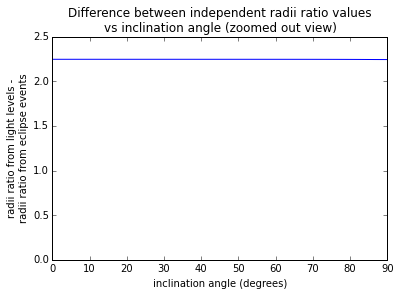

incl = nan degrees

Because there was no solution for the inclination
assume that the inclination is 90 degrees.
incl = 90.0 degrees

Stellar radii (recalculated using timings from eclipse events, valid):
radius_sep_s = 0.000481306260183 star-star separation distance
radius_sep_g = 0.163880773527 star-star separation distance

Star-star separation distance:
sep = 1.55823297919e+12 m = 10.4161441062 AU

Stellar radii:
radius_s = 749987287.707 m = 1.07833021001 Rsun
radius_g = 2.55364425964e+11 m = 367.162456742 Rsun


/Users/harrold/anaconda/lib/python2.7/site-packages/binstarsolver-0.1.3-py2.7.egg/binstarsolver/utils.py:465: UserWarning: 
No inclination solution found.
  warnings.warn("\nNo inclination solution found.")


In [10]:
print(80*'=')
print("CALCULATED VALUES")
print()
print("Smaller-radius star (_s).")
print("Greater-radius star (_g).")
print()
print("Integrated flux of stars relative to integrated flux of total system:")
(flux_intg_rel_s, flux_intg_rel_g) = \
    bss.utils.calc_fluxes_intg_rel_from_light(light_oc=light_oc, light_ref=light_ref)
print("flux_intg_rel_s = {firs}".format(firs=flux_intg_rel_s))
print("flux_intg_rel_g = {firg}".format(firg=flux_intg_rel_g))
print()
print("Ratio of stellar radii from relative light levels (invalid):")
radii_ratio_lt = bss.utils.calc_radii_ratio_from_light(light_oc=light_oc, light_tr=light_tr, light_ref=light_ref)
print("radii_ratio_lt = radius_s / radius_g from light levels = {rrl}".format(rrl=radii_ratio_lt))
print()
print("Numerical solution for orbital inclination (no solution):")
phase_orb_ext = bss.utils.calc_phase_orb_from_time_period(time_event=t4, period=period, time_mideclipse=t0)
phase_orb_int = bss.utils.calc_phase_orb_from_time_period(time_event=t3, period=period, time_mideclipse=t0)
incl_rad = \
    bss.utils.calc_incl_from_radii_ratios_phase_incl(
        radii_ratio_lt=radii_ratio_lt, phase_orb_ext=phase_orb_ext,
        phase_orb_int=phase_orb_int, show_plots=True)
print("incl = {incl} degrees".format(incl=np.rad2deg(incl_rad)))
print()
if incl_rad is np.nan:
    print("Because there was no solution for the inclination\n" +
          "assume that the inclination is 90 degrees.")
    incl_rad = np.deg2rad(90.0)
    print("incl = {incl} degrees".format(incl=np.rad2deg(incl_rad)))
print()
print("Stellar radii (recalculated using timings from eclipse events, valid):")
sep_proj_ext = bss.utils.calc_sep_proj_from_incl_phase(incl=incl_rad, phase_orb=phase_orb_ext)
sep_proj_int = bss.utils.calc_sep_proj_from_incl_phase(incl=incl_rad, phase_orb=phase_orb_int)
(radius_sep_s, radius_sep_g) = \
    bss.utils.calc_radii_sep_from_seps(sep_proj_ext=sep_proj_ext, sep_proj_int=sep_proj_int)
print("radius_sep_s = {rs} star-star separation distance".format(rs=radius_sep_s))
print("radius_sep_g = {rg} star-star separation distance".format(rg=radius_sep_g))
print()
print("Star-star separation distance:")
sep = bss.utils.calc_sep_from_semimaj_axes(axis_1=axis_s, axis_2=axis_g)
print("sep = {sep} m = {sepau} AU".format(sep=sep, sepau=sep/ast_con.au.value))
print()
print("Stellar radii:")
radius_s = bss.utils.calc_radius_from_radius_sep(radius_sep=radius_sep_s, sep=sep)
radius_g = bss.utils.calc_radius_from_radius_sep(radius_sep=radius_sep_g, sep=sep)
print("radius_s = {rs} m = {rssun} Rsun".format(rs=radius_s, rssun=radius_s/ast_con.R_sun.value))
print("radius_g = {rg} m = {rgsun} Rsun".format(rg=radius_g, rgsun=radius_g/ast_con.R_sun.value))

In [11]:
print(80*'=')
print("COMPARE TO PUBLISHED VALUES")
radius_s_ref = 1.1*ast_con.R_sun.value
radius_g_ref = 369.0*ast_con.R_sun.value
tests_failed = []
for (name, ref, test) in zip(['radius_s', 'radius_g'],
                             [radius_s_ref, radius_g_ref],
                             [radius_s, radius_g]):
    if not is_close(ref=ref, test=test, rtol=3e-2, name=name, verbose=True):
        tests_failed.append(name)
summarize_failures(tests_failed)

COMPARE TO PUBLISHED VALUES
INFO: Reference and calculated values match within tolerance.
    name = radius_s
    ref  = 765058800.0
    test = 749987287.707
    rtol = 0.03
INFO: Reference and calculated values match within tolerance.
    name = radius_g
    ref  = 2.56642452e+11
    test = 2.55364425964e+11
    rtol = 0.03
INFO: Tests complete. All tests passed.
